## データファイルの読み込み
- 遺伝子発現量・比較結果のファイル
- 遺伝子の詳細情報リスト（BLAST結果）
- 遺伝子のGO_IDリスト

In [2]:
# フォルダ名
DATA_FOLDER = 'tea_set'
# ファイル名
RES_FILE = DATA_FOLDER + '/' + 'S3.dataset.txt'    # 遺伝子発現量・比較結果
BST_FILE = DATA_FOLDER + '/' + 'S3.DEGs_BLAST.txt' # 詳細情報リスト（BLAST結果）
GOL_FILE = DATA_FOLDER + '/' + 'S3.DEGs_GO.txt'    # GO_IDリスト

In [3]:
# パッケージやツールをインポート
import pandas as pd
%matplotlib inline

# 読み込み
RES = pd.read_csv(RES_FILE, sep='\t', header=0,  index_col=0)
BST = pd.read_csv(BST_FILE, sep='\t', header=0,  index_col=0)
GOL = pd.read_csv(GOL_FILE, sep='\t', header=-1, index_col=0, names=['GO'])

## 集計
- 遺伝子総数      : 調査した遺伝子数
- 発現変動遺伝子数 : 発現量に差があった遺伝子数（FDR<0.05）
- サンプルA高発現  : サンプルAで多く発現していた遺伝子数（FDR<0.05 & logFC>0）
- サンプルB高発現  : サンプルBで多く発現していた遺伝子数（FDR<0.05 & logFC<0）

遺伝子総数: 22470
発現変動遺伝子数: 1135
サンプルA高発現: 670
サンプルB高発現: 465


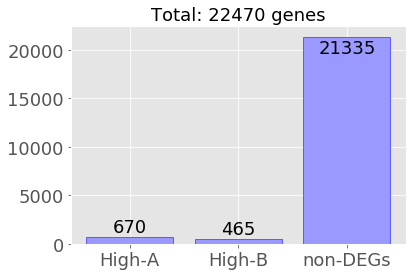

In [4]:
# 比較した遺伝子数
print('遺伝子総数:', len(RES))  

# 発現量に差があった遺伝子数
sub = RES[RES['FDR']<0.05]
print('発現変動遺伝子数:', len(sub))

# サンプルAで多く発現していた遺伝子数
subA = sub[sub['logFC']>0]
subB = sub[sub['logFC']<0]
print('サンプルA高発現:', len(subA))
print('サンプルB高発現:', len(subB))

# 棒グラフ
def bar_plot(df, log_scale=False):
    from matplotlib import pyplot as plt
    plt.style.use('ggplot')
    
    non = len(df) - len(df[df['FDR']<0.05])
    upA = len(df[(df['FDR']<0.05) & (df['logFC']>0)])
    upB = len(df[(df['FDR']<0.05) & (df['logFC']<0)])
    
    G = plt.bar(
        x      = ['High-A', 'High-B', 'non-DEGs'],
        height = [upA, upB, non], 
        align  = "center",
        log    = log_scale,
        facecolor='#9999ff',
        edgecolor='white',
    )
    
    # フォントサイズ
    plt.tick_params(labelsize=18)
    
    # カウント追加
    plt.text(0, upA*1.2, '%d'%upA, ha='center', va='bottom', size=18)
    plt.text(1, upB*1.2, '%d'%upB, ha='center', va='bottom', size=18)
    plt.text(2, non*0.9, '%d'%non, ha='center', va='bottom', size=18)
    # タイトル部分に遺伝子総数
    plt.title('Total: %d genes'%len(df), size=18)

bar_plot(RES)

## ワード検索